In [1]:
#%pip install opencv-python

In [2]:
#import images. Path: ../data/train/NORMAL/*.jpeg and each one should be centered and scaled 512x512 and be rgb2gray. then turn into dataframe

import os
import sys
sys.path.append('../')
import glob
from skimage import io, color, exposure
from skimage.transform import resize
import numpy as np
from skimage.color import rgb2gray
import pandas as pd


def crop_center(img, crop_size):
    y, x = img.shape
    start_x = x // 2 - crop_size // 2
    start_y = y // 2 - crop_size // 2
    return img[start_y:start_y + crop_size, start_x:start_x + crop_size]

def load_images(path):
    images = []
    for filename in glob.glob(os.path.join(path, "*.jpeg")):
        img = io.imread(filename)
        # Convert to grayscale if the image has a color layer
        if len(img.shape) > 2:
            img = rgb2gray(img)
        # Crop the center of the image
        crop_size = min(img.shape)
        img = crop_center(img, crop_size)
        # Resize to 128x128
        img = resize(img, (128, 128))
        # Apply histogram equalization
        img = exposure.equalize_hist(img)
        # Flatten the image
        img = img.flatten()
        # Normalize pixel values to [0, 1]
        img = img / 255.0
        images.append(img)
    return np.array(images)




In [3]:
df_train_0 = pd.DataFrame(load_images("../../data/train/NORMAL/to_model"))



In [4]:
df_train_0
#describe df_train_0
df_train_0.describe()

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
count,1.340000e+02,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,...,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,8.124537e-04,0.000836,0.000827,0.000868,0.000884,0.000881,0.000893,0.000897,0.000919,0.000911,...,0.002221,0.002152,0.002024,0.001901,0.001792,0.001684,0.001559,0.001378,0.001220,0.001092
std,7.367062e-04,0.000757,0.000772,0.000814,0.000834,0.000829,0.000832,0.000847,0.000883,0.000866,...,0.000942,0.000969,0.000990,0.000999,0.000999,0.000998,0.001003,0.000981,0.000968,0.000973
min,7.180607e-07,0.000004,0.000005,0.000004,0.000003,0.000002,0.000002,0.000004,0.000006,0.000006,...,0.000108,0.000103,0.000091,0.000086,0.000083,0.000015,0.000018,0.000007,0.000003,0.000001
25%,2.483384e-04,0.000250,0.000250,0.000242,0.000244,0.000249,0.000227,0.000228,0.000212,0.000209,...,0.001743,0.001558,0.001381,0.001250,0.000741,0.000595,0.000516,0.000292,0.000234,0.000169
50%,6.533376e-04,0.000646,0.000641,0.000670,0.000664,0.000679,0.000693,0.000690,0.000686,0.000681,...,0.002423,0.002272,0.002300,0.002077,0.001977,0.001961,0.001732,0.001473,0.001202,0.000992
75%,1.175481e-03,0.001212,0.001160,0.001244,0.001247,0.001237,0.001293,0.001317,0.001271,0.001437,...,0.002866,0.002849,0.002743,0.002695,0.002543,0.002414,0.002368,0.002079,0.001955,0.001765
max,3.921569e-03,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003912,0.003907,0.003771,0.003689,0.003425,0.003597,0.003509,0.003376,0.003594,0.003642


In [5]:
df_train_1 = pd.DataFrame(load_images("../../data/train/PNEUMONIA/to_model"))

In [6]:
df_train_1

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0.000048,0.000048,0.000050,0.000088,0.000155,0.000282,0.000438,0.000567,0.000674,0.000770,...,0.002276,0.002148,0.002319,0.002706,0.002476,0.001731,0.001466,0.001008,0.000536,0.000263
1,0.000345,0.000186,0.000179,0.000167,0.000203,0.001747,0.000605,0.001517,0.000840,0.000524,...,0.003088,0.003118,0.003077,0.003019,0.003061,0.003214,0.002938,0.002600,0.002217,0.002240
2,0.000340,0.000345,0.000338,0.000324,0.000320,0.000312,0.000306,0.000305,0.000304,0.000298,...,0.000096,0.000135,0.000168,0.000185,0.000193,0.000198,0.000204,0.000206,0.000208,0.000207
3,0.000027,0.000019,0.000018,0.000019,0.000008,0.000002,0.000007,0.000013,0.000017,0.000015,...,0.001778,0.001610,0.001527,0.001404,0.001385,0.001327,0.000895,0.000837,0.001489,0.002715
4,0.000248,0.000234,0.000294,0.000454,0.000801,0.001092,0.001006,0.000709,0.000636,0.000812,...,0.002865,0.002895,0.002978,0.003066,0.003107,0.003045,0.003025,0.003050,0.003034,0.002998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.000039,0.000175,0.000179,0.000108,0.000068,0.000051,0.000009,0.000003,0.000002,0.000005,...,0.003048,0.002912,0.002644,0.002582,0.002491,0.002565,0.002432,0.002453,0.002194,0.002084
238,0.000056,0.000076,0.000144,0.000089,0.000102,0.000125,0.000189,0.000141,0.000027,0.000014,...,0.000180,0.000123,0.000101,0.000099,0.000095,0.000098,0.000102,0.000126,0.000149,0.000172
239,0.000762,0.000838,0.000821,0.000788,0.000849,0.001036,0.001161,0.001174,0.001160,0.001151,...,0.003131,0.002901,0.002676,0.002505,0.002385,0.002316,0.002213,0.002100,0.002014,0.001943
240,0.001328,0.001411,0.001502,0.001539,0.001569,0.001640,0.001642,0.001660,0.001639,0.001654,...,0.002908,0.002684,0.002421,0.002223,0.002042,0.002235,0.002599,0.002129,0.001451,0.001187


In [7]:
#print na values
print(df_train_0.isna().sum().sum())
print(df_train_1.isna().sum().sum())


0
0


Text(0, 0.5, 'Second Principal Component')

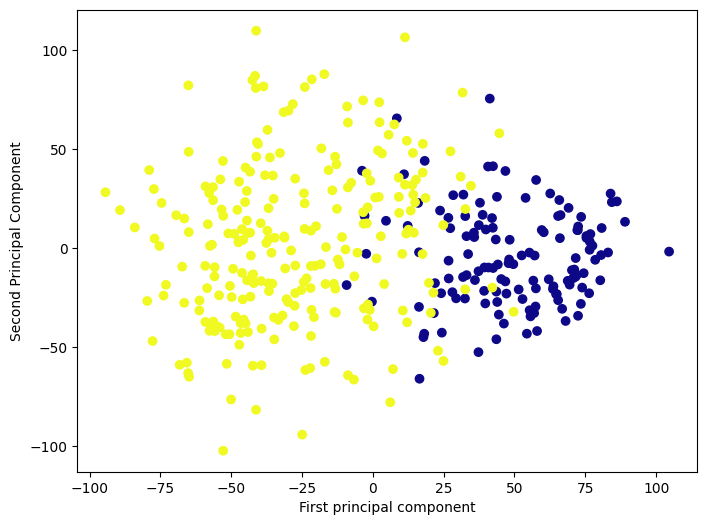

In [8]:
#prepare df_train_0 and df_train_1 PCA where label is 0 or 1

df_train_0['label'] = 0
df_train_1['label'] = 1

df_train = pd.concat([df_train_0, df_train_1])

df_train

#PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaler.fit(df_train.drop('label', axis=1))
scaled_data = scaler.transform(df_train.drop('label', axis=1))

pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_train['label'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')



In [9]:
df_test_0=pd.DataFrame(load_images("../../data/test/NORMAL"))

In [10]:
df_test_1=pd.DataFrame(load_images("../../data/test/PNEUMONIA"))

In [11]:
df_test_0['label'] = 0
df_test_1['label'] = 1

In [12]:
#basing on df_train_0,1 and df_test_0,1 run auto machine learning model and select best model




In [13]:
%pip install tpot

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

/home/iwaniukooo/.local/lib/python3.10/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [15]:
# def prepare_automl(df_train_0, df_train_1, df_test_0, df_test_1):
#     # Combine train and test data
#     df_train = pd.concat([df_train_0, df_train_1])
#     df_test = pd.concat([df_test_0, df_test_1])
    
#     # Split features and labels
#     X_train = df_train.drop(columns=['label'])
#     y_train = df_train['label']
#     X_test = df_test.drop(columns=['label'])
#     y_test = df_test['label']
    
#     # Split training data for TPOT evaluation
#     X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
    
#     # Define TPOT classifier
#     tpot = TPOTClassifier(verbosity=2, scoring='roc_auc', random_state=42, generations=5, population_size=20, cv=5)
    
#     # Fit TPOT classifier
#     tpot.fit(X_train_split, y_train_split)
    
#     # Evaluate the best model on the validation set
#     y_valid_pred = tpot.predict_proba(X_valid_split)[:, 1]
#     roc_auc = roc_auc_score(y_valid_split, y_valid_pred)
#     print(f"Validation ROC AUC: {roc_auc}")
    
#     # Evaluate the best model on the test set
#     y_test_pred = tpot.predict_proba(X_test)[:, 1]
#     test_roc_auc = roc_auc_score(y_test, y_test_pred)
#     print(f"Test ROC AUC: {test_roc_auc}")
    
#     # Export the best model
#     tpot.export('best_model_pipeline.py')
    
#     return tpot

# # Example usage
# # Assume df_train_0, df_train_1, df_test_0, df_test_1 are already defined
# tpot_model = prepare_automl(df_train_0, df_train_1, df_test_0, df_test_1)

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

def prepare_basic_ml(df_train_0, df_train_1, df_test_0, df_test_1):
    # Combine train and test data
    df_train = pd.concat([df_train_0, df_train_1])
    df_test = pd.concat([df_test_0, df_test_1])
    
    # Split features and labels
    X_train = df_train.drop(columns=['label'])
    y_train = df_train['label']
    X_test = df_test.drop(columns=['label'])
    y_test = df_test['label']
    
    # Define classifiers
    classifiers = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Support Vector Machine": SVC(probability=True),
        "Naive Bayes": GaussianNB()
    }
    
    best_classifier = None
    best_score = 0
    best_model = None
    model_scores = []

    for name, clf in classifiers.items():
        # Perform cross-validation
        scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
        mean_score = np.mean(scores)
        print(f"{name}: Mean ROC AUC = {mean_score}")
        
        # Train on full training data
        clf.fit(X_train, y_train)
        
        # Predict probabilities on test data
        y_test_pred = clf.predict_proba(X_test)[:, 1]
        
        # Calculate ROC AUC score on test data
        test_roc_auc = roc_auc_score(y_test, y_test_pred)
        print(f"{name}: Test ROC AUC = {test_roc_auc}")
        
        # Store model scores
        model_scores.append((name, mean_score, test_roc_auc))
        
        # Update best model if this one is better
        if test_roc_auc > best_score:
            best_score = test_roc_auc
            best_classifier = name
            best_model = clf
    
    # Print scores for all models
    for name, mean_score, test_score in model_scores:
        print(f"{name}: Mean CV ROC AUC = {mean_score}, Test ROC AUC = {test_score}")
    
    print(f"Best classifier: {best_classifier} with Test ROC AUC = {best_score}")
    
    return best_model

# Example usage
# Assume df_train_0, df_train_1, df_test_0, df_test_1 are already defined
best_model = prepare_basic_ml(df_train_0, df_train_1, df_test_0, df_test_1)

Logistic Regression: Mean ROC AUC = 0.9775645870883967
Logistic Regression: Test ROC AUC = 0.8459566074950691
K-Nearest Neighbors: Mean ROC AUC = 0.9771352985638699
K-Nearest Neighbors: Test ROC AUC = 0.7945595003287311
Random Forest: Mean ROC AUC = 0.9801990668062096
Random Forest: Test ROC AUC = 0.8562842428227043
Support Vector Machine: Mean ROC AUC = 0.9859616353663971
Support Vector Machine: Test ROC AUC = 0.8463510848126232
Naive Bayes: Mean ROC AUC = 0.9239111527802002
Naive Bayes: Test ROC AUC = 0.768397983782599
Logistic Regression: Mean CV ROC AUC = 0.9775645870883967, Test ROC AUC = 0.8459566074950691
K-Nearest Neighbors: Mean CV ROC AUC = 0.9771352985638699, Test ROC AUC = 0.7945595003287311
Random Forest: Mean CV ROC AUC = 0.9801990668062096, Test ROC AUC = 0.8562842428227043
Support Vector Machine: Mean CV ROC AUC = 0.9859616353663971, Test ROC AUC = 0.8463510848126232
Naive Bayes: Mean CV ROC AUC = 0.9239111527802002, Test ROC AUC = 0.768397983782599
Best classifier: Ran

In [17]:
df_val_0=pd.DataFrame(load_images("../../data/val/NORMAL"))
df_val_1=pd.DataFrame(load_images("../../data/val/PNEUMONIA"))

df_val_0['label'] = 0
df_val_1['label'] = 1


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

def prepare_voting_model(df_train_0, df_train_1, df_test_0, df_test_1):
    # Combine train and test data
    df_train = pd.concat([df_train_0, df_train_1])
    df_test = pd.concat([df_test_0, df_test_1])
    
    # Split features and labels
    X_train = df_train.drop(columns=['label'])
    y_train = df_train['label']
    X_test = df_test.drop(columns=['label'])
    y_test = df_test['label']
    
    # Define individual classifiers
    clf1 = RandomForestClassifier(random_state=42)
    clf2 = SVC(probability=True, random_state=42)
    clf3 = LogisticRegression(max_iter=1000, random_state=42)
    
    # Combine classifiers using VotingClassifier
    voting_clf = VotingClassifier(
        estimators=[
            ('rf', clf1),
            ('svc', clf2),
            ('lr', clf3)
        ],
        voting='soft'  # Use soft voting to consider probabilities
    )
    
    # Fit the combined model on the training data
    voting_clf.fit(X_train, y_train)
    
    # Predict probabilities on the test data
    y_test_pred = voting_clf.predict_proba(X_test)[:, 1]
    
    # Calculate ROC AUC score on the test data
    test_roc_auc = roc_auc_score(y_test, y_test_pred)
    print(f"Voting Classifier Test ROC AUC: {test_roc_auc}")
    
    # Predict class labels on the test data
    y_test_pred_labels = voting_clf.predict(X_test)
    
    # Calculate accuracy on the test data
    test_accuracy = accuracy_score(y_test, y_test_pred_labels)
    print(f"Voting Classifier Test Accuracy: {test_accuracy}")
    
    return voting_clf

# Example usage
# Assume df_train_0, df_train_1, df_test_0, df_test_1 are already defined
voting_model = prepare_voting_model(df_train_0, df_train_1, df_test_0, df_test_1)


Voting Classifier Test ROC AUC: 0.861385053692746
Voting Classifier Test Accuracy: 0.7900641025641025


In [22]:

def validate_voting_model(voting_model, df_val_0, df_val_1):
    # Combine validation data
    df_val = pd.concat([df_val_0, df_val_1])
    
    # Split features and labels
    X_val = df_val.drop(columns=['label'])
    y_val = df_val['label']
    
    # Evaluate on the validation set
    y_val_pred = voting_model.predict_proba(X_val)[:, 1]
    val_roc_auc = roc_auc_score(y_val, y_val_pred)
    print(f"Voting Classifier Validation ROC AUC: {val_roc_auc}")
    
    y_val_pred_labels = voting_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred_labels)
    print(f"Voting Classifier Validation Accuracy: {val_accuracy}")

# Example usage
# Assume df_val_0, df_val_1 are already defined and voting_model has been trained
validate_voting_model(voting_model, df_val_0, df_val_1)


Voting Classifier Validation ROC AUC: 0.84375
Voting Classifier Validation Accuracy: 0.75
